In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [2]:
train = pd.read_csv('train.csv')
print(train.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
n_features = train.select_dtypes(include=[np.number])
train = train.drop(['PassengerId','Ticket','Name','Cabin'],axis=1)
print(train.head(5))

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


Text(0.5, 1.0, 'Male')

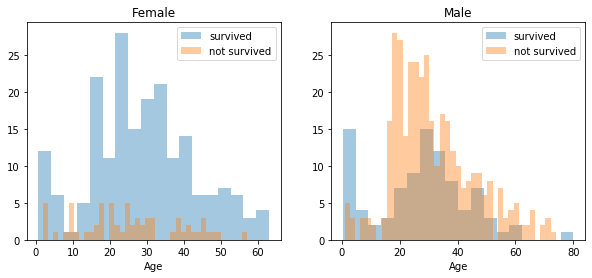

In [4]:
import seaborn as sns
survived = 'survived'
notsurvived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
w = train[train['Sex']=='female']
m = train[train['Sex']=='male']
x = sns.distplot(w[w['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
x = sns.distplot(w[w['Survived']==0].Age.dropna(), bins=40, label = notsurvived, ax = axes[0], kde =False)
x.legend()
x.set_title('Female')
x = sns.distplot(m[m['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
x = sns.distplot(m[m['Survived']==0].Age.dropna(), bins=40, label = notsurvived, ax = axes[1], kde = False)
x.legend()
x.set_title('Male')

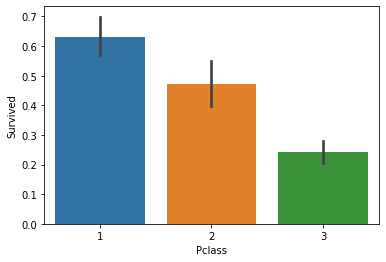

In [5]:
sns.barplot(x='Pclass', y='Survived', data=train)

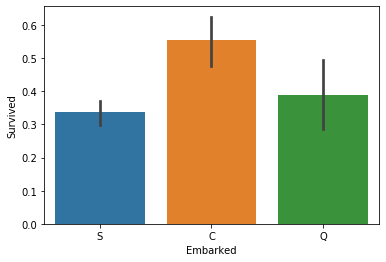

In [6]:
sns.barplot(x='Embarked', y='Survived', data=train)

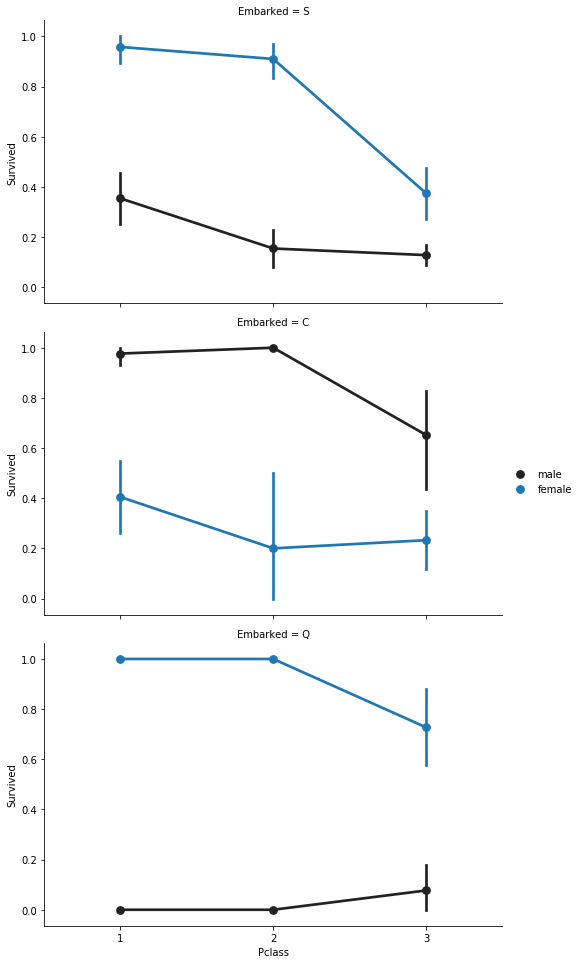

In [7]:
FG = sns.FacetGrid(train, row='Embarked', height=4.5, aspect=1.6)
FG.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FG.add_legend()

In [8]:
for x in train:
    train['relatives'] = train['SibSp'] + train['Parch']
    train.loc[train['relatives'] > 0, 'Hasrelatives'] = 1
    train.loc[train['relatives'] == 0, 'Hasrelatives'] = 0
    train['Hasrelatives'] = train['Hasrelatives'].astype(int)
train['Hasrelatives'].value_counts()

0    537
1    354
Name: Hasrelatives, dtype: int64

In [9]:
print(train.head(5))


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  relatives  \
0         0       3    male  22.0      1      0   7.2500        S          1   
1         1       1  female  38.0      1      0  71.2833        C          1   
2         1       3  female  26.0      0      0   7.9250        S          0   
3         1       1  female  35.0      1      0  53.1000        S          1   
4         0       3    male  35.0      0      0   8.0500        S          0   

   Hasrelatives  
0             1  
1             1  
2             0  
3             1  
4             0  


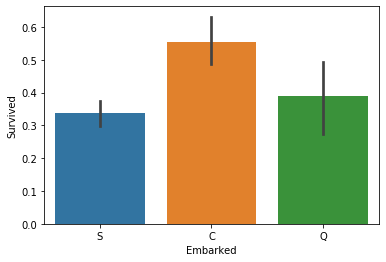

In [10]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [11]:
train["Sex"] = train["Sex"].map({'female':1,'male':0}).astype(int)

In [12]:
print(train.dtypes)

Survived          int64
Pclass            int64
Sex               int32
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked         object
relatives         int64
Hasrelatives      int32
dtype: object


In [13]:
# Null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

              Null Count
Feature                 
Age                  177
Embarked               2
Hasrelatives           0
relatives              0
Fare                   0
Parch                  0
SibSp                  0
Sex                    0
Pclass                 0
Survived               0


In [14]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [15]:
##handling missing value
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [16]:
print(train.dtypes)

Survived          int64
Pclass            int64
Sex               int32
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked         object
relatives         int64
Hasrelatives      int32
dtype: object


In [17]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
common_value = 'S'
train['Embarked'] = train['Embarked'].fillna(common_value)

In [19]:
nullsnew = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
nullsnew.columns  = ['Null Count']
nullsnew.index.name  = 'Feature'
print(nullsnew)

              Null Count
Feature                 
Hasrelatives           0
relatives              0
Embarked               0
Fare                   0
Parch                  0
SibSp                  0
Age                    0
Sex                    0
Pclass                 0
Survived               0


In [20]:
train["Embarked"] = train["Embarked"].map({'C':2,'S':1,'Q':0}).astype(int)

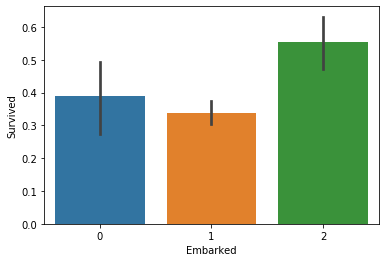

In [21]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [22]:
# CORRELATED FEATURES
corr = n_features.corr()
print('The top 3 correlated features \n')
print(corr['Survived'].sort_values(ascending=False)[:3], '\n')

The top 3 correlated features 

Survived    1.000000
Fare        0.257307
Parch       0.081629
Name: Survived, dtype: float64 



In [23]:
print(train.dtypes)

Survived          int64
Pclass            int64
Sex               int32
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked          int32
relatives         int64
Hasrelatives      int32
dtype: object


In [24]:
train["Embarked"] = train["Embarked"].astype(np.int64)
train["Sex"] = train["Sex"].astype(np.int64)
train["Hasrelatives"] = train["Hasrelatives"].astype(np.int64)
train["Age"] = train["Age"].astype(np.int64)
train["Fare"] = train["Fare"].astype(np.int64)
print(train.dtypes)

Survived        int64
Pclass          int64
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Fare            int64
Embarked        int64
relatives       int64
Hasrelatives    int64
dtype: object


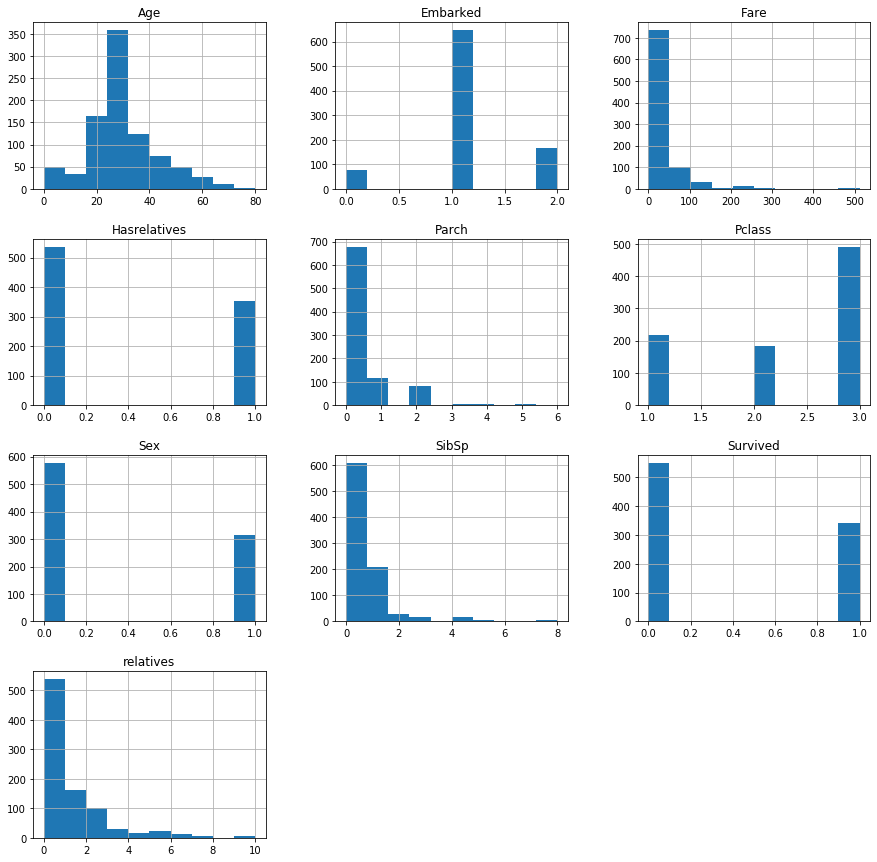

In [25]:
import matplotlib.pyplot as plt
train[train.dtypes[(train.dtypes=="float64")|(train.dtypes=="int64")]
                      .index.values].hist(figsize=[15,15])
plt.show();


In [26]:
x_train = np.array(train.drop(['Survived'], 1).astype(float))
y_train = np.array(train['Survived'])

In [27]:
x_train, x_test, y_train, y_test= train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [28]:

#Naive Bayes

guassian = GaussianNB()
guassian.fit(x_train,y_train)
y_pred = guassian.predict(x_test)
guassian_score = round(guassian.score(x_test,y_test) * 100,2)

print("Accuracy Score:",guassian_score)

Accuracy Score: 78.73


In [29]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       168
           1       0.69      0.78      0.73       100

    accuracy                           0.79       268
   macro avg       0.77      0.79      0.78       268
weighted avg       0.80      0.79      0.79       268



In [30]:
#svc

svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
svc_accuracy = round(svc.score(x_test, y_test) * 100, 2)

print("SVC Score:",svc_accuracy)

SVC Score: 72.01


In [31]:
print("SVC Classification Report:\n",classification_report(y_test,y_pred))

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81       168
           1       0.82      0.32      0.46       100

    accuracy                           0.72       268
   macro avg       0.76      0.64      0.64       268
weighted avg       0.75      0.72      0.68       268



In [32]:
#KNN

#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)

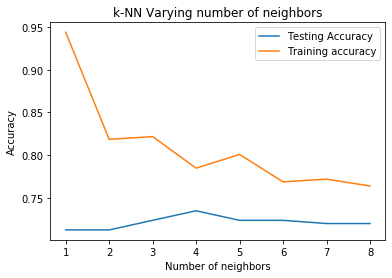

In [33]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=6)

#Fit the model
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
knn_accuracy = round(knn.score(x_test, y_test) * 100, 2)

print("KNN Score:",knn_accuracy)

KNN Score: 72.39


In [35]:
print("KNN Classification Report:\n",classification_report(y_test,y_pred))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80       168
           1       0.71      0.44      0.54       100

    accuracy                           0.72       268
   macro avg       0.72      0.67      0.67       268
weighted avg       0.72      0.72      0.71       268



In [36]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

#Fit the model
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
knn_accuracy = round(knn.score(x_test, y_test) * 100, 2)

print("KNN Score:",knn_accuracy)

KNN Score: 72.01


In [37]:
print("KNN Classification Report:\n",classification_report(y_test,y_pred))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       168
           1       0.65      0.53      0.59       100

    accuracy                           0.72       268
   macro avg       0.70      0.68      0.69       268
weighted avg       0.71      0.72      0.71       268



In [38]:
# Linear SVM
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
svclinear_accuracy = round(svc.score(x_test, y_test) * 100, 2)
print("SVM linear Score:",svclinear_accuracy)

SVM linear Score: 79.1


In [39]:
print("SVM linear Classification Report:\n",classification_report(y_test,y_pred))

SVM linear Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       168
           1       0.72      0.71      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [40]:
# NonLinear SVM
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
svclinear_accuracy = round(svc.score(x_test, y_test) * 100, 2)

print("SVM nonlinear Score:",svclinear_accuracy)

SVM nonlinear Score: 72.01


In [41]:
print("SVM onlinear Classification Report:\n",classification_report(y_test,y_pred))

SVM onlinear Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81       168
           1       0.82      0.32      0.46       100

    accuracy                           0.72       268
   macro avg       0.76      0.64      0.64       268
weighted avg       0.75      0.72      0.68       268

